In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

%matplotlib inline

In [4]:
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")

In [11]:
print(data.head())
print(data.info())
print(data.describe())
print(data.groupby(['country']).size())
print(data.groupby(['source']).size())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None
                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.68546

Some Preliminary observations. 
- The dataset has around 30,000 datapoints, implying that we have a large enough dataset to draw conclusions from (Central Limit Theorem)
- The user base is mostly young, with the upto 75% of the users in their mid 30s. 
- While the e-commerce focuses primarily on US consumers, it has a small customer base in China, with sales being higher than Germany and UK. 
- However, considering how China is the 2nd most populous country in the world, it doesn't fare well compared to the US. This is one of the factors to be looked into. 
- The average conversion rate is around 3.2% which is the industry standard. If there are 100 users on the website, around 3 of them will buy the product. 
- However, it seems that the maximum is 123. Since, the e-commerce is not targeting for the age group above 100, we can remove these datapoints as outliers. 

In [14]:
data[data['age'] >= 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [ ]:
#We can remove the above consumers, even though they purhcased the product.

In [17]:
data = data[data['age'] < 100]

In [4]:
#Checking for any missing data
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [10]:
country_df = data.groupby(['country']).size()
country_df.to_frame()

,0
country,
China,76602
Germany,13055
UK,48449
US,178092


In [11]:
data.groupby(['source']).size()

source
Ads        88739
Direct     72420
Seo       155039
dtype: int64

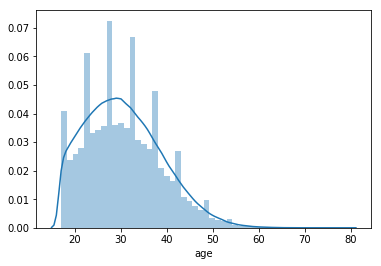

In [12]:
sns.distplot(data['age'])

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


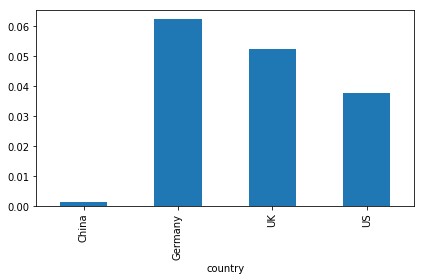

In [18]:
rcParams.update({'figure.autolayout': True})
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()



While china has a larger number of visitors on the site, it has much lower rate of conversion. 
Most probably cause :
- Language Barrier 
- Lack of Chinese items 
- Lack of items that foreigners/visitors expect to buy from American websites because of its unavailability in homeland.(souvenires, Sports Jerseys, Highend fashion apparrel, Hip-Hop Merchandise) 

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


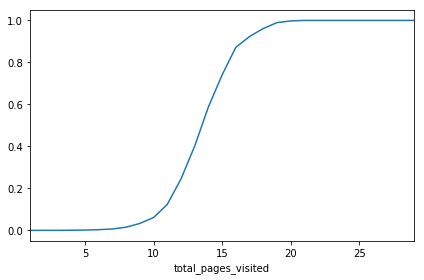

In [23]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()

The above graph shows that spending more time on the website, leads to higher conversions. However, it would be ideal if the consumer visits lower number of pages to purchase a product. The average consumer who is 80% converted for the purchase goes through 17 pages. 

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


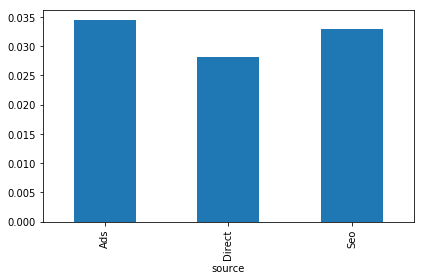

In [25]:
data.groupby(['source'])['converted'].mean().plot.bar()

# Machine Learning 


I am going to create test/training set with a standard 66% split (if the data were too small, I would cross-validate). Then, I am going to build the forest with standard values for the 3 important parameters (100 trees, trees as large as possible, 3 random variables selected at each split).

Since we working with determing if a visitor on the website can convert or not, I am going to choose a Classification Algorithm. 

I am going to pick a random forest to predict conversion rate. I picked a random forest because: it usually requires very little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict conversion, then I will use its partial dependence plots and variable importance to get insights. Also, I will build a simple tree to find the most obvious user segments.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
#I am going to create dummy variable, since it makes it easier to work with machine learning algorithm. 
data_dummy = pd.get_dummies(data,drop_first = True)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)
  
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.9838851885571901 
 OOB Confusion Matrix 
         0     1
0  200872  1102
1    2261  4455
